<a href="https://colab.research.google.com/github/Wilian21/Balanceo_Datos-Clasificadores_Binarios/blob/main/Conjuntos_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

InstalaciOn libreria balanceo de datos

In [ ]:
pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
#---------------------
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE

LEER CSV

In [ ]:
df = pd.read_csv("pe_section_headers.csv")
df.head(5)

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1


In [ ]:
#Eliminar la columna hash
data= df.drop(['hash'],axis=1)
data.head()
data.shape

(43293, 5)

In [ ]:
#Verificar que los datos sean numericos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   size_of_data     43293 non-null  int64  
 1   virtual_address  43293 non-null  int64  
 2   entropy          43293 non-null  float64
 3   virtual_size     43293 non-null  int64  
 4   malware          43293 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.7 MB


In [ ]:
#Ver si existen datos faltantes
data.isna().sum().sort_values()

size_of_data       0
virtual_address    0
entropy            0
virtual_size       0
malware            0
dtype: int64

In [ ]:
data.drop_duplicates()
print(data.shape)

(43293, 5)


NUMERO DE OBSERVACIONES BINARIAS

In [ ]:
#Ver cuantas clases existe en el dataset
print(data.groupby('malware').size())

malware
0     1725
1    41568
dtype: int64


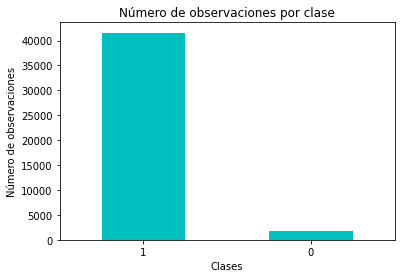

In [ ]:
count_classes = data.value_counts(data['malware'], sort = True)
count_classes.plot(kind = 'bar',rot=0, color="c")
plt.title("Número de observaciones por clase")
plt.xlabel("Clases")
plt.ylabel("Número de observaciones")
plt.show()

DIVIDIR EL DATASET EN X, Y

In [ ]:
#Division del dataset X los atributos
#Y las clases
#X= data[['size_of_data','virtual_address','entropy','virtual_size']]
X=data.iloc[:,:-1]
y = data['malware']

print(X.shape)
print(y.shape)

(43293, 4)
(43293,)


In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[-1.65823308e-01 -4.70320638e-02  1.60502208e-01 -1.69751884e-01]
 [-2.61375786e-01 -4.70320638e-02  2.42860621e-01 -2.64214120e-01]
 [-4.80404753e-01 -4.70320638e-02 -3.71902961e-01 -4.80555372e-01]
 ...
 [-3.20277998e-01 -4.70320638e-02  2.80161311e-01 -3.22172006e-01]
 [-1.65823308e-01 -4.70320638e-02  1.60502208e-01 -1.69751884e-01]
 [ 1.41340821e-01 -4.70320638e-02  1.47659537e-04  1.33833915e-01]]


CREACION DE STRATIFIEDKFOLD

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
kf=StratifiedShuffleSplit(n_splits=10, train_size=0.8, random_state=None)

for train_index, test_index in kf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: [28321 17900 19157 ...  7511 27578 31528] TEST: [20665 23393  6716 ... 30028  4688  5733]
TRAIN: [10869 23451  9248 ... 10599  5463  2014] TEST: [42149 18491 43010 ... 41348 18534 35330]
TRAIN: [19848 38592 11756 ... 37716 43257  6853] TEST: [19535 36154 12273 ... 25313 33444 12930]
TRAIN: [ 1260   329 30988 ...  5004 11607 17546] TEST: [38368     3 21684 ... 31437 31708 28472]
TRAIN: [24272 29322 31999 ... 15242 35921  5126] TEST: [22004 40113 34378 ... 14748 24416 12865]
TRAIN: [15640  4777  4569 ...  1755 21420 31848] TEST: [ 7950  5760 42063 ... 42039 39556  6703]
TRAIN: [17219 26200 32352 ...  6238 43013 19752] TEST: [ 2072 17863 40631 ... 38582 27253 37243]
TRAIN: [12735 35636 31625 ... 38361  7422  3109] TEST: [41544  9315 16656 ...  3312  6697 12969]
TRAIN: [42837 28643   372 ... 20025 22916 41888] TEST: [25704  9649 41662 ...  7103 14563 12233]
TRAIN: [ 5384 36354 15082 ... 41291 27842 18640] TEST: [18514 18650 28535 ... 27823  5359  3455]


CREACION DE ALGORITMOS

In [ ]:
########### REGRESION LOGISTICA ##############
rl = LogisticRegression(penalty='l2', dual=False, tol=0.0001,class_weight='balanced', solver='lbfgs',
                        multi_class='ovr')

#class_weight='balanced', 
rlB = LogisticRegression(penalty='l2', dual=False, tol=0.0001,solver='lbfgs', multi_class='ovr')

########### RANDOM FOREST ##############
rf = RandomForestClassifier(n_estimators=100,bootstrap = True, criterion = 'gini')

########### RED NEURONAL ##############

mlp =MLPClassifier(hidden_layer_sizes = (100),activation='relu', solver='adam',alpha=0.0001,max_iter=2000)

########### NAIVE BAYES ##############
nv=GaussianNB(priors = None , var_smoothing = 1e-09)


TECNICAS DE BALANCEO DE DATOS

In [ ]:
#SMOTETOMEK
stomek = SMOTETomek(sampling_strategy='auto',random_state= None, smote=None,tomek=None)
X_stomek, y_smotek = stomek.fit_resample(X, y)
print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smotek)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 41009, 0: 41009})


In [ ]:
#NEARMISS
near = NearMiss(sampling_strategy= 0.5, version=2, n_neighbors=3,n_neighbors_ver3=3)
X_near, y_near= near.fit_resample(X, y)
print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_near)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 3450, 0: 1725})


In [ ]:
#SMOTEEN
smoteen = SMOTEENN(sampling_strategy='auto',random_state=None, smote=None, enn=None)
X_smoteen, y_smoteen = smoteen.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smoteen)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 37979, 0: 30224})


In [ ]:
#SMOTE
smote = SMOTE(sampling_strategy=0.9858,random_state=None, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smote)))

Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 41568, 0: 40977})


Text(0, 0.5, 'Número de observaciones')

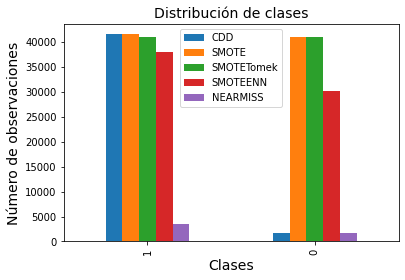

In [ ]:
plotdata = pd.DataFrame({
    "CDD":[41568, 1725],
    "SMOTE":[41568,40977],
    "SMOTETomek":[41009,41009],
    "SMOTEENN":[37979,30224],
    "NEARMISS":[3450,1725]
    }, 
    index=["1","0"]
)
plotdata.plot(kind="bar",width=0.5)
plt.title("Distribución de clases", fontsize = 14)
plt.xlabel("Clases", fontsize = 14)
plt.ylabel("Número de observaciones", fontsize = 14)

FUNCION DE VALIDACION CRUZADA

In [ ]:
def validacion(entrenamiento,prueba,modelo):
  start = time.time()
  TN=[]
  FP=[]
  FN=[]
  TP=[]
  ac=[]
  fs=[]
  pre=[]
  re=[]
  pr0=[]
  re0=[]
  f10=[]
  pr1=[]
  re1=[]
  f11=[]
  for train, test in kf.split(entrenamiento,prueba):
    X_train, X_test = entrenamiento[train], entrenamiento[test]
    end = time.time()
    start1=time.time()
    y_train, y_test = prueba.iloc[train], prueba.iloc[test]
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    #print(y_pred)
    conf = confusion_matrix(y_test,y_pred)
    TN.append(conf[0,0])
    FP.append(conf[0,1])
    FN.append(conf[1,0])
    TP.append(conf[1,1])
    accy = metrics.accuracy_score(y_test, y_pred)
    ac.append(accy)
    f1= metrics.f1_score(y_test, y_pred)
    fs.append(f1)
    presi = metrics.precision_score(y_test, y_pred)
    pre.append(presi)
    reca = metrics.recall_score(y_test, y_pred)
    re.append(reca)
    #print(accy,"---",f1,"---",presi,"---",reca)
    #print("MatrizConfusion")
    #print("----------------- SPLIT {} ----------------------".format(cont))
    #print(conf)
    a=classification_report(y_test,y_pred,output_dict=True)
    l0 = ['0',"precision", "recall", "f1-score"]
    l1=['1',"precision", "recall", "f1-score"]
    result = list(map(a.get, l0))
    result1= list(map(a.get,l1))
    #print(result)
    pr0.append(result[0]['precision'])
    re0.append(result[0]['recall'])
    f10.append(result[0]['f1-score'])
    pr1.append(result1[0]['precision'])
    re1.append(result1[0]['recall'])
    f11.append(result1[0]['f1-score'])
    end1=time.time()

  
  print("MATRIZ DE CONFUSION")
  print('[[{} {} ] '.format(round(np.mean(TN)),(round(np.mean(FP)))))
  print(' [{} {} ]]'.format(round(np.mean(FN)),(round(np.mean(TP)))))
  print("----------Medidas de rendimiento------------")
  print('Accuracy {}'.format(np.mean(ac)))   
  print('F1-Score {}'.format(np.mean(fs)))
  print('Presicion {}'.format(np.mean(pre)))
  print('Recall {}'.format(np.mean(re)))
  TNF=round(np.mean(TN))/(round(np.mean(TN)) + round(np.mean(FP)))
  print('TNR {}'.format(TNF))

  print("-----------Reporte por clase-------------------")
  print("         Presicion   Recall   F1-Score")
  print('Clase 0:  {:.3f}     {:.3f}    {:.3f} '.format(np.mean(pr0),np.mean(re0),np.mean(f10)))
  print('Clase 1:  {:.3f}     {:.3f}    {:.3f} '.format(np.mean(pr1),np.mean(re1),np.mean(f11)))
  print("----------------------------------------")
  print("Tiempo de entrenamiento:", end - start,"seg")
  print("Tiempo de validacion:", end1 - start1,"seg")

REGRESION LOGISTICA SIN BALANCEO DE DATOS

In [ ]:
#REGRESION LOGISTICA SIN BALANCEO DE DATOS
validacion(X,y,rl)

MATRIZ DE CONFUSION
[[181 164 ] 
 [2159 6155 ]]
----------Medidas de rendimiento------------
Accuracy 0.7317357662547639
F1-Score 0.8408860751945328
Presicion 0.9740979131188773
Recall 0.7402814529708925
TNR 0.5246376811594203
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.078     0.526    0.136 
Clase 1:  0.974     0.740    0.841 
----------------------------------------
Tiempo de entrenamiento: 2.2585835456848145 seg
Tiempo de validacion: 0.21023344993591309 seg


REGRESION LOGISTICA CON BALANCEO DE DATOS

In [ ]:
#REGRESION LOGISTICA CON BALANCEO DE DATOS 
print("NEARMISS")
validacion(X_near,y_near,rlB)

NEARMISS
MATRIZ DE CONFUSION
[[314 31 ] 
 [0 690 ]]
----------Medidas de rendimiento------------
Accuracy 0.970048309178744
F1-Score 0.9780350785429303
Presicion 0.9570240949344981
Recall 1.0
TNR 0.9101449275362319
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  1.000     0.910    0.953 
Clase 1:  0.957     1.000    0.978 
----------------------------------------
Tiempo de entrenamiento: 0.41817283630371094 seg
Tiempo de validacion: 0.036986589431762695 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,rlB)

SMOTETOMEK
MATRIZ DE CONFUSION
[[4661 3541 ] 
 [2395 5807 ]]
----------Medidas de rendimiento------------
Accuracy 0.6381431358205315
F1-Score 0.6616368586208592
Presicion 0.6211201160373128
Recall 0.7080102414045355
TNR 0.5682760302365277
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.661     0.568    0.611 
Clase 1:  0.621     0.708    0.662 
----------------------------------------
Tiempo de entrenamiento: 6.286749601364136 seg
Tiempo de validacion: 0.4210991859436035 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,rlB)

SMOTEENN
MATRIZ DE CONFUSION
[[338 5707 ] 
 [589 7007 ]]
----------Medidas de rendimiento------------
Accuracy 0.5384649219265449
F1-Score 0.6900205000527393
Presicion 0.5511310507959375
Recall 0.9224986835176407
TNR 0.05591397849462366
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.365     0.056    0.097 
Clase 1:  0.551     0.922    0.690 
----------------------------------------
Tiempo de entrenamiento: 5.5805792808532715 seg
Tiempo de validacion: 0.32874441146850586 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,rlB)

SMOTE
MATRIZ DE CONFUSION
[[3786 4408 ] 
 [1479 6835 ]]
----------Medidas de rendimiento------------
Accuracy 0.6434005693863952
F1-Score 0.6989915916650686
Presicion 0.6079431431414604
Recall 0.8221554005292278
TNR 0.4620453990724921
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.719     0.462    0.563 
Clase 1:  0.608     0.822    0.699 
----------------------------------------
Tiempo de entrenamiento: 6.475366830825806 seg
Tiempo de validacion: 0.3976271152496338 seg


RANDOM FOREST SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,rf)

MATRIZ DE CONFUSION
[[156 189 ] 
 [81 8233 ]]
----------Medidas de rendimiento------------
Accuracy 0.9688532163067329
F1-Score 0.9838854068904812
Presicion 0.977560168326346
Recall 0.9902934808756314
TNR 0.45217391304347826
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.659     0.452    0.536 
Clase 1:  0.978     0.990    0.984 
----------------------------------------
Tiempo de entrenamiento: 32.908077001571655 seg
Tiempo de validacion: 3.5659313201904297 seg


RANDOM FOREST CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,rf)

NEARMISS
MATRIZ DE CONFUSION
[[335 10 ] 
 [8 682 ]]
----------Medidas de rendimiento------------
Accuracy 0.9830917874396136
F1-Score 0.9873456630402007
Presicion 0.985576828801829
Recall 0.9891304347826086
TNR 0.9710144927536232
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.978     0.971    0.975 
Clase 1:  0.986     0.989    0.987 
----------------------------------------
Tiempo de entrenamiento: 2.9628639221191406 seg
Tiempo de validacion: 0.32343125343322754 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,rf)

SMOTETOMEK
MATRIZ DE CONFUSION
[[8047 155 ] 
 [332 7870 ]]
----------Medidas de rendimiento------------
Accuracy 0.970287734698854
F1-Score 0.9699625931601596
Presicion 0.980700916378631
Recall 0.9594611070470617
TNR 0.9811021702023897
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.960     0.981    0.971 
Clase 1:  0.981     0.959    0.970 
----------------------------------------
Tiempo de entrenamiento: 88.21419906616211 seg
Tiempo de validacion: 9.620742797851562 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,rf)

SMOTEENN
MATRIZ DE CONFUSION
[[6004 41 ] 
 [88 7508 ]]
----------Medidas de rendimiento------------
Accuracy 0.9905945311927278
F1-Score 0.9915280070397484
Presicion 0.9946090254695829
Recall 0.9884676145339653
TNR 0.993217535153019
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.986     0.993    0.989 
Clase 1:  0.995     0.988    0.992 
----------------------------------------
Tiempo de entrenamiento: 68.02326989173889 seg
Tiempo de validacion: 7.483160018920898 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,rf)

SMOTE
MATRIZ DE CONFUSION
[[7991 204 ] 
 [410 7904 ]]
----------Medidas de rendimiento------------
Accuracy 0.962820279847356
F1-Score 0.9626232705981534
Presicion 0.9748404745156289
Recall 0.9507096463796006
TNR 0.9751067724222087
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.951     0.975    0.963 
Clase 1:  0.975     0.951    0.963 
----------------------------------------
Tiempo de entrenamiento: 89.39718699455261 seg
Tiempo de validacion: 9.733158588409424 seg


NAIVE BAYES SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,nv)

MATRIZ DE CONFUSION
[[24 321 ] 
 [813 7501 ]]
----------Medidas de rendimiento------------
Accuracy 0.8690610925049083
F1-Score 0.9297261802773242
Presicion 0.9589866933704576
Recall 0.9022131344719749
TNR 0.06956521739130435
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.029     0.070    0.041 
Clase 1:  0.959     0.902    0.930 
----------------------------------------
Tiempo de entrenamiento: 0.5203063488006592 seg
Tiempo de validacion: 0.0372161865234375 seg


NAIVE BAYES CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,nv)

NEARMISS
MATRIZ DE CONFUSION
[[313 32 ] 
 [10 680 ]]
----------Medidas de rendimiento------------
Accuracy 0.9600966183574879
F1-Score 0.9705442907365829
Presicion 0.9554888805617547
Recall 0.9860869565217392
TNR 0.9072463768115943
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.970     0.908    0.938 
Clase 1:  0.955     0.986    0.971 
----------------------------------------
Tiempo de entrenamiento: 0.14359331130981445 seg
Tiempo de validacion: 0.011545658111572266 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,nv)

SMOTETOMEK
MATRIZ DE CONFUSION
[[7962 240 ] 
 [6956 1246 ]]
----------Medidas de rendimiento------------
Accuracy 0.5613143135820531
F1-Score 0.2571776530837371
Presicion 0.8385960167655346
Recall 0.15192635942453062
TNR 0.9707388441843453
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.534     0.971    0.689 
Clase 1:  0.839     0.152    0.257 
----------------------------------------
Tiempo de entrenamiento: 1.1031808853149414 seg
Tiempo de validacion: 0.08082842826843262 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,nv)

SMOTEENN
MATRIZ DE CONFUSION
[[5816 229 ] 
 [6329 1267 ]]
----------Medidas de rendimiento------------
Accuracy 0.5192214647020013
F1-Score 0.27866857909984377
Presicion 0.8469578167206742
Recall 0.16681147972617166
TNR 0.9621174524400331
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.479     0.962    0.639 
Clase 1:  0.847     0.167    0.279 
----------------------------------------
Tiempo de entrenamiento: 0.9063727855682373 seg
Tiempo de validacion: 0.0680856704711914 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,nv)

SMOTE
MATRIZ DE CONFUSION
[[7910 285 ] 
 [7004 1310 ]]
----------Medidas de rendimiento------------
Accuracy 0.5584953661639107
F1-Score 0.26434124982757934
Presicion 0.8216883314556014
Recall 0.15754149627134956
TNR 0.9652226967663209
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.530     0.965    0.685 
Clase 1:  0.822     0.158    0.264 
----------------------------------------
Tiempo de entrenamiento: 1.0931756496429443 seg
Tiempo de validacion: 0.08103299140930176 seg


RED NEURONAL SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,mlp)

MATRIZ DE CONFUSION
[[2 343 ] 
 [2 8312 ]]
----------Medidas de rendimiento------------
Accuracy 0.9602263540824575
F1-Score 0.9797039231515485
Presicion 0.9604150368378184
Recall 0.999783497714698
TNR 0.005797101449275362
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.643     0.007    0.014 
Clase 1:  0.960     1.000    0.980 
----------------------------------------
Tiempo de entrenamiento: 187.32965064048767 seg
Tiempo de validacion: 16.264222621917725 seg


RED NEURONAL CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,mlp)

NEARMISS
MATRIZ DE CONFUSION
[[331 14 ] 
 [6 684 ]]
----------Medidas de rendimiento------------
Accuracy 0.981256038647343
F1-Score 0.9860304327587407
Presicion 0.98013089990608
Recall 0.9920289855072465
TNR 0.9594202898550724
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.984     0.960    0.972 
Clase 1:  0.980     0.992    0.986 
----------------------------------------
Tiempo de entrenamiento: 48.76693820953369 seg
Tiempo de validacion: 5.735718011856079 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,mlp)

SMOTETOMEK
MATRIZ DE CONFUSION
[[6765 1437 ] 
 [2052 6150 ]]
----------Medidas de rendimiento------------
Accuracy 0.787289685442575
F1-Score 0.7788059909505608
Presicion 0.8109219669490677
Recall 0.7498049256278957
TNR 0.8247988295537674
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.768     0.825    0.795 
Clase 1:  0.811     0.750    0.779 
----------------------------------------
Tiempo de entrenamiento: 1552.51797580719 seg
Tiempo de validacion: 147.72768759727478 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,mlp)

SMOTEENN
MATRIZ DE CONFUSION
[[4612 1433 ] 
 [1020 6576 ]]
----------Medidas de rendimiento------------
Accuracy 0.8201304889670844
F1-Score 0.8426609939266518
Presicion 0.8216799043911628
Recall 0.8656793048973144
TNR 0.762944582299421
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.820     0.763    0.790 
Clase 1:  0.822     0.866    0.843 
----------------------------------------
Tiempo de entrenamiento: 1740.0144755840302 seg
Tiempo de validacion: 225.89528489112854 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,mlp)

SMOTE
MATRIZ DE CONFUSION
[[6832 1363 ] 
 [2094 6220 ]]
----------Medidas de rendimiento------------
Accuracy 0.7905808952692469
F1-Score 0.7823641190944041
Presicion 0.821133818105157
Recall 0.7480875631464998
TNR 0.8336790726052471
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.766     0.834    0.798 
Clase 1:  0.821     0.748    0.782 
----------------------------------------
Tiempo de entrenamiento: 1957.657794713974 seg
Tiempo de validacion: 204.57349681854248 seg


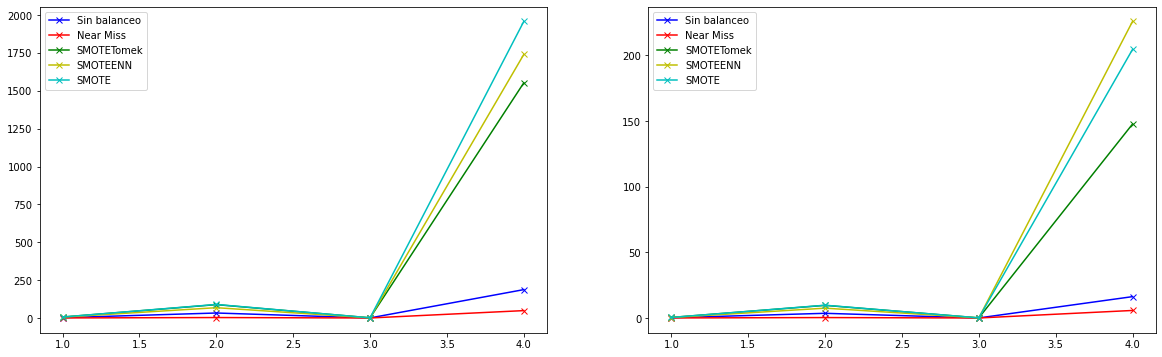

In [ ]:
SBL = [2.2585,32.9080,0.5203,187.3296] 
NM = [0.4181, 2.9628,0.1435,48.7669]
TOM = [6.2867,88.2141,1.1031,1552.5179]
ENN = [5.5805,68.0232,0.9063,1740.0144]
SMT = [6.4753,89.3971,1.0931 ,1957.6577]

plt.figure(figsize=(20,6))
plt.title("TIEMPO DE EJECUCIÓN")
plt.subplot(1, 2, 1)
y=[1,2,3,4]
#plt.ylabel("Tiempo train (seg)")
#plt.xlabel("Clasificadores")

plt.plot(y,SBL, marker='x',color='b', label = "Sin balanceo")
plt.plot(y,NM, marker='x', color='r', label = "Near Miss")
plt.plot(y,TOM, marker='x', color='g', label = "SMOTETomek")
plt.plot(y,ENN, marker='x', color='y', label = "SMOTEENN")
plt.plot(y,SMT, marker='x', color='c', label = "SMOTE")
plt.legend()

plt.subplot(1, 2, 2)
SBL = [0.2102,3.5659,0.037 ,16.2642] 
NM = [0.0369, 0.3234,0.011,5.7357]
TOM = [0.4210,9.6207,0.0808,147.7276]
ENN = [0.3287 , 7.4831,0.0680 , 225.8952]
SMT = [0.3976,9.7331,0.0810 ,204.5734]

y=[1,2,3,4]
#plt.ylabel("Tiempo test (seg)")
#plt.xlabel("Clasificadores")

plt.plot(y,SBL, marker='x',color='b', label = "Sin balanceo")
plt.plot(y,NM, marker='x', color='r', label = "Near Miss")
plt.plot(y,TOM, marker='x', color='g', label = "SMOTETomek")
plt.plot(y,ENN, marker='x', color='y', label = "SMOTEENN")
plt.plot(y,SMT, marker='x', color='c', label = "SMOTE")
plt.legend()

plt.savefig('Tiempos.png')